In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
df=pd.read_csv('house.csv')

In [ ]:
df.shape

(5000, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [ ]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
Avg. Area Income,0
Avg. Area House Age,0
Avg. Area Number of Rooms,0
Avg. Area Number of Bedrooms,0
Area Population,0
Price,0
Address,0


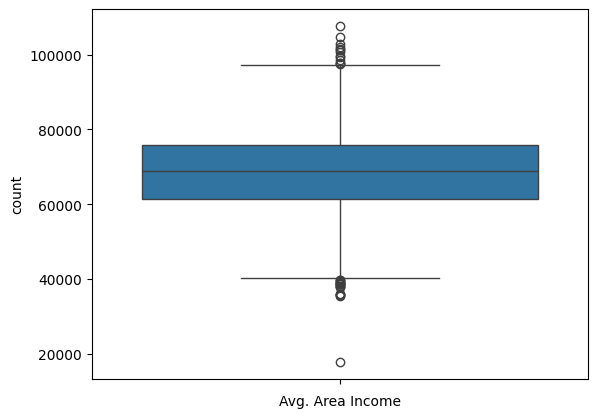

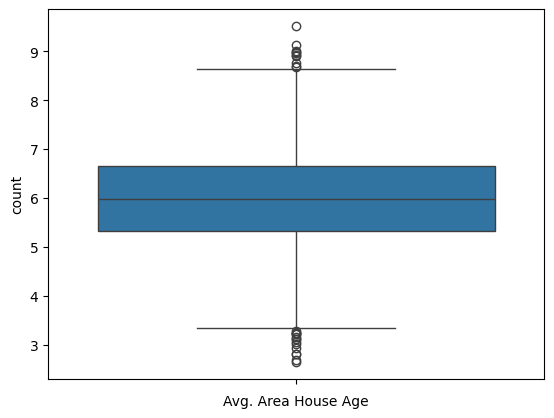

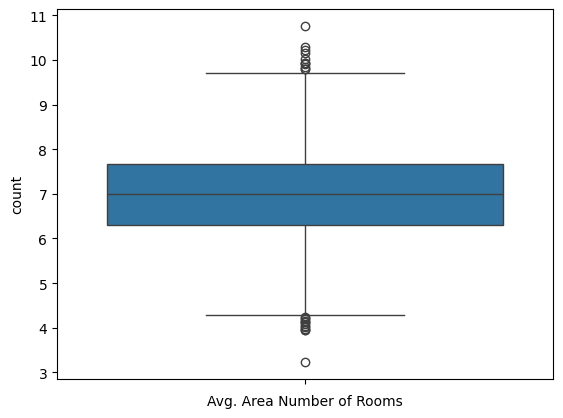

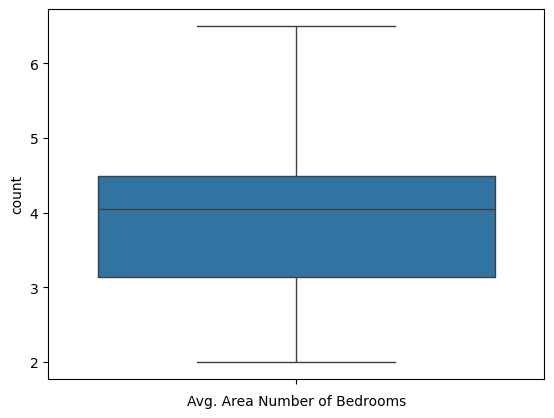

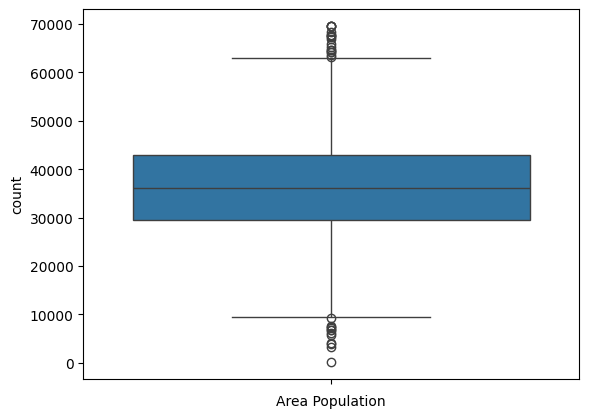

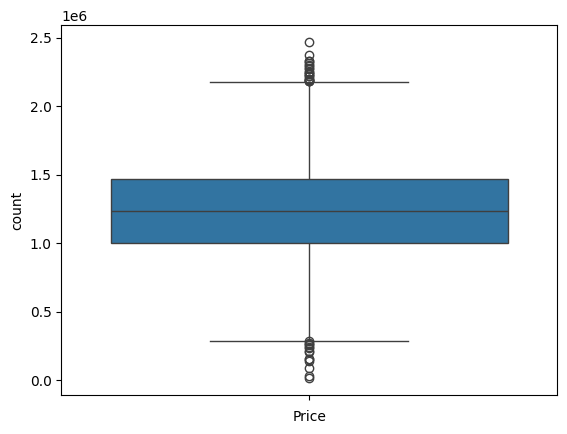

In [ ]:
for col in df.columns:
  if ((df[col].dtype=="int64") or (df[col].dtype=="float64")):
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()

In [ ]:
out_list=["Avg. Area Income","Avg. Area House Age","Avg. Area Number of Rooms","Area Population","Price"]
for i in out_list:
  Q1=df[i].quantile(0.25)
  Q3=df[i].quantile(0.75)
  IQR=Q3-Q1
  df=df[(df[i]>=Q1-1.5*IQR) & (df[i]<=Q3+1.5*IQR)]



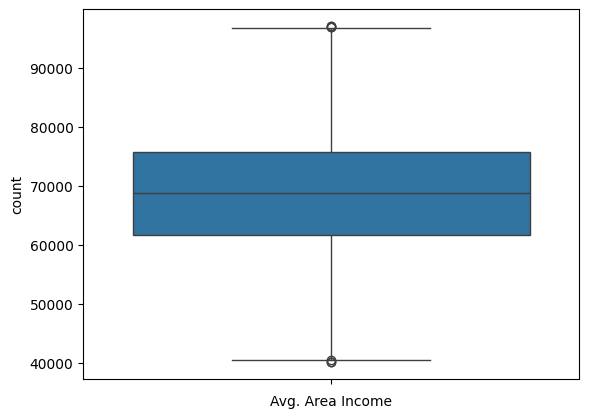

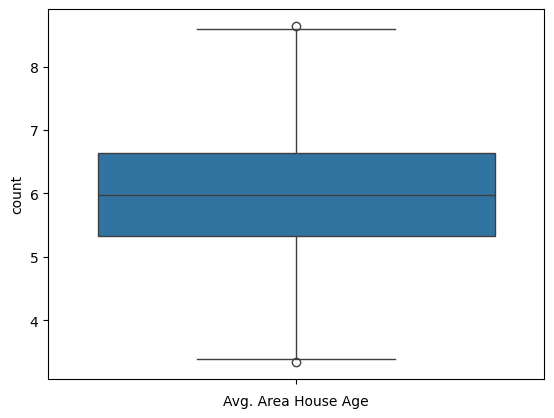

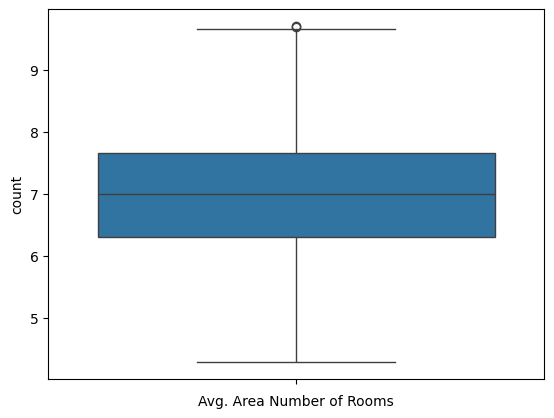

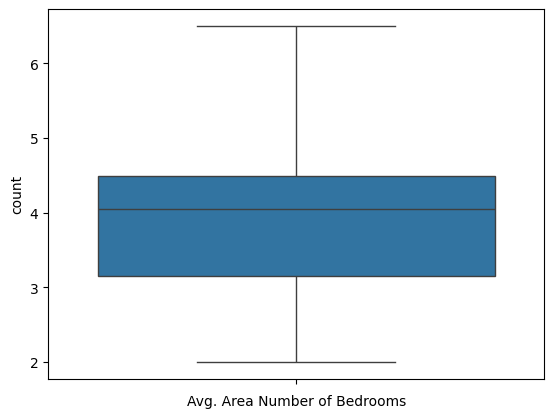

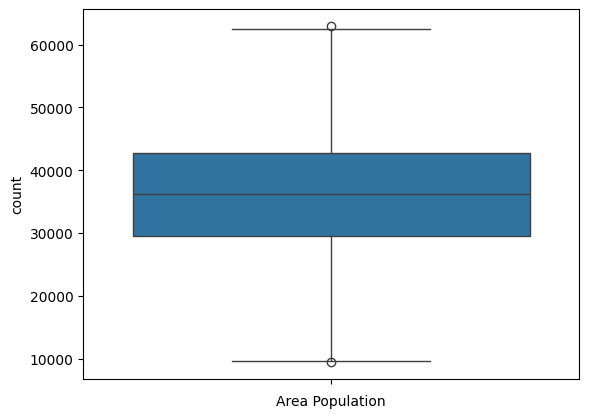

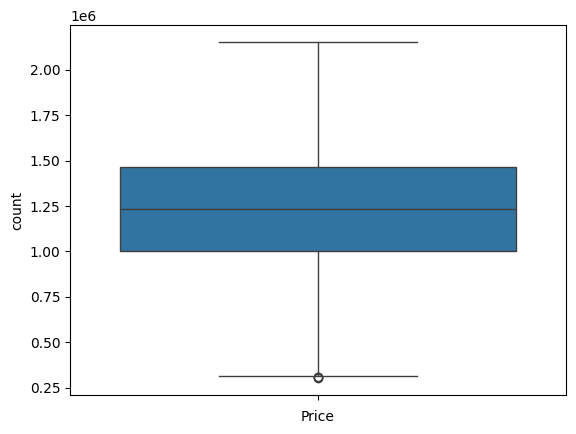

In [ ]:
for col in df.columns:
    if ((df[col].dtype == "int64") or (df[col].dtype == "float64")):
        sns.boxplot(df[col])
        plt.xlabel(col)
        plt.ylabel('count')
        plt.show()

In [ ]:
df1=pd.get_dummies(df)

In [ ]:
df1

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,"Address_000 Adkins Crescent\r\nSouth Teresa, AS 49642-1348","Address_000 Todd Pines\r\nAshleyberg, KY 90207-1179","Address_001 Steve Plaza\r\nJessicastad, UT 25190","Address_0010 Gregory Loaf\r\nSouth Ericfort, VA 34651-0718",...,Address_Unit 9446 Box 0958\r\nDPO AE 97025,Address_Unit 9463 Box 0963\r\nDPO AE 49984-2796,Address_Unit 9494 Box 2307\r\nDPO AE 58622,Address_Unit 9664 Box 1605\r\nDPO AA 30902,Address_Unit 9732 Box 1846\r\nDPO AE 69898-3304,Address_Unit 9774 Box 4511\r\nDPO AE 44963,Address_Unit 9778 Box 2114\r\nDPO AP 59374,Address_Unit 9785 Box 0790\r\nDPO AP 60371-0797,Address_Unit 9831 Box 7128\r\nDPO AA 54705,Address_Unit 9871 Box 9037\r\nDPO AP 37275-9289
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df =df.drop_duplicates()
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df.columns:

    if df[i].dtype == "object":

        df[i] = le.fit_transform(df[i])
        print(le.classes_)

['000 Adkins Crescent\r\nSouth Teresa, AS 49642-1348'
 '000 Todd Pines\r\nAshleyberg, KY 90207-1179'
 '001 Steve Plaza\r\nJessicastad, UT 25190' ...
 'Unit 9785 Box 0790\r\nDPO AP 60371-0797'
 'Unit 9831 Box 7128\r\nDPO AA 54705'
 'Unit 9871 Box 9037\r\nDPO AP 37275-9289']


<Axes: >

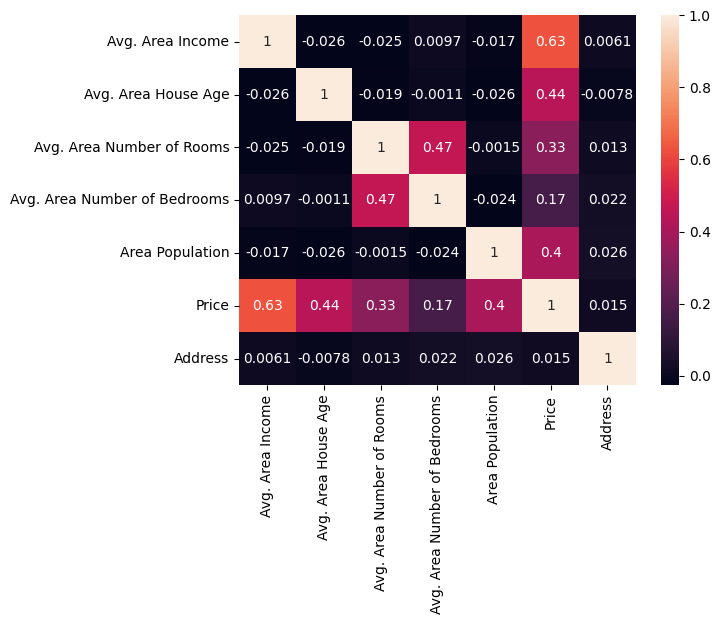

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
import seaborn as sns
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
x=df.drop('Price',axis=1)
y=df['Price']

In [ ]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,933
1,79248.642455,6.002900,6.730821,3.09,40173.072174,837
2,61287.067179,5.865890,8.512727,5.13,36882.159400,3948
3,63345.240046,7.188236,5.586729,3.26,34310.242831,4652
4,59982.197226,5.040555,7.839388,4.23,26354.109472,4597


In [ ]:
y.head()

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05


In [ ]:
x_train,x_test , y_train, y_test = train_test_split(x,y,train_size=0.90,random_state = 0)

In [ ]:
x_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Address
3425,70553.924224,3.571056,7.913362,5.49,22179.640769,3492
3816,77628.221577,6.215554,7.314936,6.00,26257.116848,3385
2907,58412.283049,5.666298,8.281879,6.47,22900.113453,908
1269,84712.910024,5.953310,7.432142,4.01,11072.498530,4148
2469,64769.644841,4.214642,7.695856,4.16,43510.940146,622
...,...,...,...,...,...,...
2581,58354.574085,5.516292,6.427598,3.18,35765.749207,4389
2815,69185.706180,6.418572,8.722698,6.19,50096.980271,1256
1387,70036.831534,6.294500,6.169512,2.33,25064.267120,2365
2805,61091.453881,5.997743,8.196512,4.05,46536.724882,4340


In [ ]:
y_train

,Price
3425,7.322442e+05
3816,1.446983e+06
2907,1.055484e+06
1269,1.154917e+06
2469,1.107287e+06
...,...
2581,7.558437e+05
2815,1.757396e+06
1387,9.538407e+05
2805,1.450123e+06


In [ ]:
x_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Address
2404,72915.040253,5.466742,7.128905,5.06,42030.421241,1968
1245,58385.215373,7.588559,6.406118,2.30,41930.375009,753
3607,69906.319663,5.956133,7.017751,4.22,45733.688206,2877
1714,46517.175275,6.326333,7.570723,5.01,26452.367894,3998
779,69700.741309,6.570369,5.335759,4.37,21934.898637,3756
...,...,...,...,...,...,...
3020,66357.528417,6.378066,7.221475,6.36,38072.284681,930
4638,71784.016236,4.790862,6.695281,4.26,15554.284182,2317
1455,61300.753518,5.662526,7.869699,4.42,29408.946392,3413
4435,66789.161806,5.390036,6.783347,4.47,35735.323711,3866


In [ ]:
y_test

,Price
2404,1.395219e+06
1245,1.266210e+06
3607,1.411266e+06
1714,6.651601e+05
779,1.070319e+06
...,...
3020,1.045705e+06
4638,8.251784e+05
1455,9.719290e+05
4435,1.037033e+06


In [ ]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(4856, 6)
(4370, 6)
(486, 6)
(4856,)
(4370,)
(486,)


In [ ]:
model = LinearRegression()
model.fit(x_train , y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([1347796.06365238, 1293594.17957266, 1404913.46732399,
        741551.24840269,  941248.60269042, 1653747.62933149,
       1242770.91477039,  796434.09584705, 1647027.56100972,
        938093.12155156, 1148969.30773368, 1374743.33714181,
       1010864.61182926, 1276442.9881779 , 1424528.8112372 ,
       1021668.57917699, 1119817.50108382, 1469838.30191669,
       1525338.69460784, 1112484.81331995,  977439.9799092 ,
       1283923.16579973, 1679123.1994985 , 1848737.97953511,
       1041293.0586266 , 1224729.72863169, 1636797.65492036,
       1716579.83450389, 1492100.83833537,  798705.96065559,
       1036694.846708  ,  998555.77620124,  753043.34630336,
       1511827.69269886,  780608.87704625, 1826808.96754367,
       1419986.13396627, 1224554.96406249, 1005232.73592907,
       1538529.19092545, 1183253.86754378, 1479729.75616691,
        849413.8170289 , 1534771.84457855, 1372447.99020836,
        934426.68229127,  881353.34370401, 2194134.17114342,
       1452724.94047945,

In [ ]:
model.score(x_train,y_train)

0.9096597204401394

In [ ]:
model.score(x_test,y_test)

0.9206176604771868

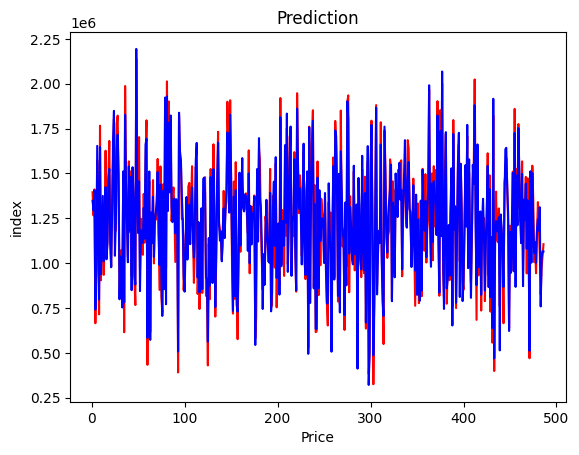

In [ ]:
c = [ i for i in range(1,len(y_test)+1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('Price')
plt.ylabel('index')
plt.title('Prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse = mean_squared_error(y_test,y_pred)
print(mse)

8867694967.447668


In [ ]:
rsq = r2_score(y_test,y_pred)
print(rsq)

0.9206176604771868
